Data Evaluation

- Ziel ist es, die erstellten Modelle auf Performance und Overfitting zu evaluieren

1. Decision Tree

In [10]:
import pandas as pd;

cleaned_data = pd.read_csv('cleaned_data.csv')
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
dec_tree = tree.DecisionTreeClassifier()
ran_for = RandomForestClassifier(n_estimators = 70)

In [11]:
features = ['TIME.OCC_hour_cos','LAT','LONG', 'RD']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
#predict_data_encoded = pd.get_dummies(predict_data, columns=['AREA.NAME'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
ran_for.fit(X_train, y_train)

print(f'Model Accuracy: {ran_for.score(X_test,y_test)}')
max_tree_depths = [estimator.tree_.max_depth for estimator in ran_for.estimators_]
max_depth = max(max_tree_depths)
print("Maximale Tiefe aller Entscheidungsbäume im Random Forest:", max_depth)

print("Anzahl der Entscheidungsbäume im Random Forest:", ran_for.n_estimators)
###########################################################




Model Accuracy: 0.290917092350846
None
Anzahl der Entscheidungsbäume im Random Forest: 70


In [28]:
acc = []
for i in range(1, 40,1):
    #dec_tree = tree.DecisionTreeClassifier(max_depth=i)
    ran_for = RandomForestClassifier(max_depth=i, n_estimators = 62)
    score = cross_validate(ran_for, predict_data_encoded[features], predict_data_encoded[target], cv=5, return_train_score=True)
    print(f"Max Depth: {i}, Test Accuracy: {round(score['test_score'].mean(), ndigits=4)} ({round(score['test_score'].std(), ndigits=4)}), Train Accuracy: {round(score['train_score'].mean(), ndigits=4)} ({round(score['train_score'].std(), ndigits=4)})")
    acc.append((score['test_score'].mean(),score['test_score'].std(),score['train_score'].mean(),score['train_score'].std()))
print(acc)

Max Depth: 1, Test Accuracy: 0.1823 (0.0053), Train Accuracy: 0.1834 (0.0062)
Max Depth: 2, Test Accuracy: 0.1914 (0.0051), Train Accuracy: 0.1916 (0.0024)
Max Depth: 3, Test Accuracy: 0.1975 (0.0047), Train Accuracy: 0.1987 (0.0026)
Max Depth: 4, Test Accuracy: 0.2037 (0.0033), Train Accuracy: 0.2059 (0.0013)
Max Depth: 5, Test Accuracy: 0.209 (0.003), Train Accuracy: 0.2108 (0.0014)
Max Depth: 6, Test Accuracy: 0.2123 (0.0027), Train Accuracy: 0.2156 (0.0013)
Max Depth: 7, Test Accuracy: 0.2174 (0.0022), Train Accuracy: 0.2213 (0.0012)
Max Depth: 8, Test Accuracy: 0.2214 (0.0027), Train Accuracy: 0.2261 (0.0009)
Max Depth: 9, Test Accuracy: 0.2276 (0.0031), Train Accuracy: 0.2338 (0.0007)
Max Depth: 10, Test Accuracy: 0.2331 (0.0034), Train Accuracy: 0.2418 (0.0006)
Max Depth: 11, Test Accuracy: 0.2406 (0.0043), Train Accuracy: 0.2534 (0.0007)
Max Depth: 12, Test Accuracy: 0.2479 (0.0062), Train Accuracy: 0.2653 (0.0006)
Max Depth: 13, Test Accuracy: 0.2551 (0.0068), Train Accuracy: 

In [ ]:
#results_dec_tree_TIME_occ_hour_cos_lat_long = [(0.18038084136557025, 0.004884301135223393, 0.1830914391327704, 0.004541777448432953), (0.19462378738083547, 0.003278193996493177, 0.1941985169016264, 0.002846601599333509), (0.19843808382154166, 0.003420792407360242, 0.19836755155613167, 0.0018985575935053284), (0.20110406219191898, 0.0033678488269967446, 0.20132986320037652, 0.0014048796050944359), (0.20219068477489593, 0.004924031143510782, 0.20423459461125856, 0.0013422491846157725), (0.20572037479389982, 0.0027353954511652235, 0.2080521829568763, 0.0010924102052051693), (0.2092665136485415, 0.002237738172529344, 0.2125714310371643, 0.0014014643413931217), (0.21351184302925813, 0.002422206469552559, 0.21735349292502795, 0.0012060598127805913), (0.2178854935046049, 0.0024941777373494603, 0.2242339534893852, 0.0018476439102932908), (0.22203951513356918, 0.0031139022971799473, 0.23100727326805784, 0.0024367174691736996), (0.22686723183932753, 0.0021597569748149185, 0.23892336026316094, 0.002105097428457597), (0.23055074024269656, 0.0018968385949371532, 0.24735726078763803, 0.0023145295474786658), (0.23517610126494265, 0.0018611791036137362, 0.25775136651567243, 0.002484452644169231), (0.238218819286291, 0.0016532417994199397, 0.2694918282449647, 0.0027760731220873988), (0.24096211896848563, 0.0020211800261581005, 0.2835174138655266, 0.0034389618305107742), (0.2450848858529023, 0.0009121925091132711, 0.2996346119433809, 0.004365585688265474), (0.24677199776757935, 0.0022109894667940236, 0.31765916449995213, 0.005031857492522387), (0.24770233662034866, 0.003184197051779758, 0.33794663136106023, 0.005775608456886865), (0.24875441715731766, 0.004533909486236721, 0.36008777961000327, 0.006661219455386985), (0.24944127486782527, 0.007153758875936261, 0.38353765065727663, 0.007380486610709177), (0.2490028440430668, 0.009350031102915005, 0.4078411527775095, 0.007845889130428035), (0.24867957369222166, 0.01135497674142519, 0.4322910740368943, 0.008559379487845372), (0.24832833649373023, 0.013786639328384446, 0.4559889525098214, 0.008846773354558886), (0.24778461585851255, 0.016220750736908752, 0.478346438794898, 0.009031646174642756), (0.24716439367140647, 0.01759468816007754, 0.49904478359299526, 0.009081504648106078), (0.2464043336328245, 0.0193636426442963, 0.5174310650267093, 0.009089673631497599), (0.24564180622525375, 0.021236753890163905, 0.5333806623583801, 0.009020098371376246), (0.24497634146994124, 0.022262087695632753, 0.5467138421817759, 0.00901601666415551), (0.24432486048861177, 0.023175796901660085, 0.5576619547396373, 0.00897080065565073), (0.2438814924459991, 0.02433342601578385, 0.566428999598589, 0.008985414201409088), (0.24341097840505554, 0.024998238001917104, 0.5732730608940229, 0.009120338059542557), (0.2431197861211837, 0.025424635099073625, 0.5784639444306711, 0.009247473155401456), (0.24311156104364318, 0.02587076536646952, 0.5823662582985696, 0.00943708560952687), (0.2431025130801082, 0.026092208114765654, 0.5851663165644683, 0.009612060822063999), (0.24299886831086934, 0.026220038582314444, 0.587150787940471, 0.009753994799596613), (0.24277183717482834, 0.02659979145646104, 0.5885133897220319, 0.00982902086608953), (0.2428253045160884, 0.026447658909634637, 0.58944434327718, 0.009881561082439781), (0.24271425663507634, 0.026596112270016424, 0.5900635394578284, 0.00989496515896086), (0.2427109663124294, 0.026587852495451217, 0.5904982723416354, 0.009891247961448697)]

#resultsfor = [(0.18225960967642452, 0.005329320787281552, 0.18344309163574388, 0.0062200014589525385), (0.19143793638800394, 0.005124293934403363, 0.1915605065579433, 0.0024156258549421273), (0.1975266654395987, 0.00469276474871934, 0.19872722439690527, 0.002583793250644976), (0.20367133024346407, 0.0033390799063613076, 0.20592807889901402, 0.0012732901343346223), (0.20897860954914202, 0.0030028728367391734, 0.21082242266575194, 0.0013881310008615597), (0.21227468386231313, 0.002737960062129408, 0.2155964646323692, 0.0013219209460469945), (0.2173573997527904, 0.0022294972677589535, 0.22132284695256277, 0.0011900790442932196), (0.22143081255871938, 0.0026855922205234607, 0.22614336423050996, 0.0009217730958154405), (0.22757547755542648, 0.0030540884197791086, 0.2337805969433134, 0.0006872120400110051), (0.23309086961374587, 0.0034023301853843236, 0.24177524011820967, 0.0005707499784397413), (0.2405524834427118, 0.004272053592906035, 0.2534369397946018, 0.0006903609982389389), (0.2478890670240887, 0.006177399461029196, 0.2652874211486309, 0.0006140561994697544), (0.25509568111687614, 0.006848936282587408, 0.2790047450941775, 0.0009125948950015452), (0.2622027630705409, 0.007504393705129814, 0.2958149654697445, 0.000998849444782229), (0.2691609591415312, 0.008694549289624027, 0.31616186317003947, 0.0016014232389952936), (0.2754092695841147, 0.009800686170285776, 0.3404036714122622, 0.0022952397793155285), (0.2811870662462602, 0.011699388882949108, 0.36994576615821695, 0.003240332210506808), (0.2856034946273748, 0.013448060038045146, 0.40182892045002133, 0.0038372335821366854), (0.28864950787022603, 0.015961241742902647, 0.4382311166544589, 0.0042608741301506875), (0.29075531241558517, 0.01769336161465969, 0.4766537723801131, 0.0049153194759287795), (0.2909971549345338, 0.020403397229926828, 0.5104625838505273, 0.004365871978493563), (0.2894975968373686, 0.02238365265543404, 0.5437729127170766, 0.004523527583969654), (0.28788699059868583, 0.024258579863025487, 0.5722415431566445, 0.003655646524953242), (0.28523993468506603, 0.026020894650919463, 0.5934377543056666, 0.0028128851760377996), (0.28235350742080634, 0.027176575745783485, 0.6104386080974249, 0.004278291396819853), (0.2798347738062315, 0.028748933399929594, 0.6216114912091151, 0.0054772925068770715), (0.2768702009502867, 0.029517823091742335, 0.629434010400993, 0.006905899362840354), (0.27510906042820354, 0.029928037577163568, 0.6340402464397565, 0.007460656052199716), (0.27327553327814963, 0.030584772353883412, 0.6367866316416275, 0.008049524610192621), (0.271388538614293, 0.03122559049678989, 0.6382919510199864, 0.008448908430510913), (0.27010531575240465, 0.03133783302051144, 0.6390857396538673, 0.008703772555034501), (0.2689191567505727, 0.03110318281565944, 0.6395103960321953, 0.008883723204814818), (0.2680949341567537, 0.03191567591671336, 0.6397386616725187, 0.008927836152784443), (0.26743275794453136, 0.03180790471668453, 0.6398404558179605, 0.008959346908072074), (0.26736283850962367, 0.03158852604591507, 0.639893100868667, 0.008973645772622742), (0.26683721160240387, 0.032169040879086966, 0.6399138709861831, 0.008986329255762966), (0.26635517985055557, 0.03177707878467995, 0.6399301169189406, 0.008990040773610668), (0.2664958415522345, 0.032239993673588374, 0.6399383427073735, 0.008991017246040013), (0.2664374382144509, 0.03207525887503241, 0.6399420443123163, 0.008992956459892036)]


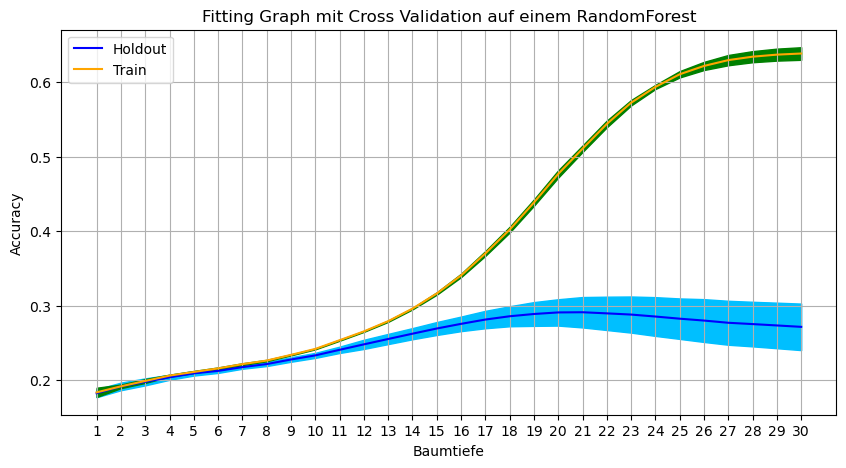

In [31]:
from matplotlib import pyplot as plt
import numpy as np

test_acc_list = list(map(lambda x: x[0], acc))[:30]
test_std_list = list(map(lambda x: x[1], acc))[:30]
train_acc_list = list(map(lambda x: x[2], acc))[:30]
train_std_list = list(map(lambda x: x[3], acc))[:30]

lower_bound_test = np.array(test_acc_list) - np.array(test_std_list)
upper_bound_test = np.array(test_acc_list) + np.array(test_std_list)
lower_bound_train = np.array(train_acc_list) - np.array(train_std_list)
upper_bound_train = np.array(train_acc_list) + np.array(train_std_list)

tree_depth = list(range(1,31, 1))
N = len(tree_depth)
tree_quantity = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(tree_quantity, test_acc_list, label="Holdout", 
color="blue")
plt.fill_between(tree_quantity, lower_bound_test, upper_bound_test, color="deepskyblue")


plt.plot(tree_quantity, train_acc_list, label="Train", 
color="orange")
plt.fill_between(tree_quantity, lower_bound_train, upper_bound_train, color="green")


plt.xticks(tree_quantity, tree_depth)
plt.grid(True)
plt.xlabel("Baumtiefe")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Fitting Graph mit Cross Validation auf einem RandomForest', fontsize=12)
plt.show()

0.21368386129139283
0.22634059669817141
0.23787431711326784
0.2391796702558492
0.24138719574891626
0.24375251914550586
0.24215877402956346
0.24419054199672613
0.24595908496409447


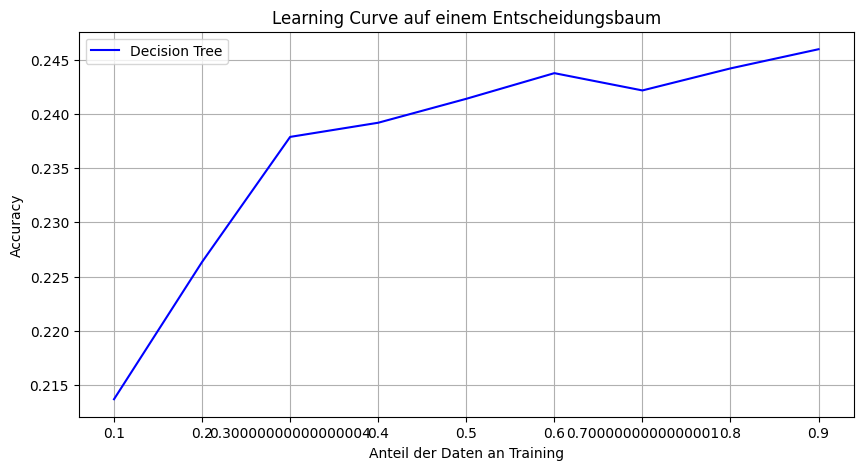

In [69]:
learning_curve = []
dec_tree = tree.DecisionTreeClassifier(max_depth=20)
for test_size in np.flip(np.linspace(0.1,1,9,endpoint=False)):
    dec_tree = tree.DecisionTreeClassifier(max_depth=20)
    X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=test_size, random_state=42)
    dec_tree.fit(X_train,y_train)
    score = dec_tree.score(X_test,y_test)
    learning_curve.append(score)
    print(score)

train_amount = list(np.linspace(0.1,1,9,endpoint=False))
N = len(train_amount)
train_range = np.arange(N)
plt.subplots(figsize=(10, 5))

plt.plot(train_range, learning_curve, label="Decision Tree", 
color="blue")

plt.xticks(train_range, train_amount)
plt.grid(True)
plt.xlabel("Anteil der Daten an Training")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Learning Curve auf einem Entscheidungsbaum', fontsize=12)
plt.show()

- nun Versuchen wir einen Naive-Bayes Klassifizierer

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb_class = GaussianNB()

features = ['UNIX.TIMESTAMP','AREA','RD','LAT','LONG']
target = 'CRIME_CAT'
selection = features + [target]

predict_data_encoded = cleaned_data[selection].copy()
predict_data_encoded = pd.get_dummies(predict_data_encoded, columns=['AREA','RD'])

X_train, X_test, y_train, y_test = train_test_split(predict_data_encoded.drop(target, axis=1), predict_data_encoded[target], test_size=0.2, random_state=42)
nb_class.fit(X_train,y_train)

print(f'Model Accuracy: {nb_class.score(X_test,y_test)}')

Model Accuracy: 0.17471559361350344
